In [107]:
# importing Hierarchial Clustering libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch # for dendrogram
from sklearn .cluster import AgglomerativeClustering # for Model building

In [108]:
# read the data
crime= pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [109]:
# Normalization function
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return(x)

In [110]:
crime.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [111]:
#Normalized data frame (considering the numerical part of data)
df_norm=norm_func(crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [112]:
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()
new_df=normalize.fit_transform(crime.iloc[:,1:].to_numpy())
df_norm1=pd.DataFrame(new_df,columns=crime.columns[1:])
df_norm1

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


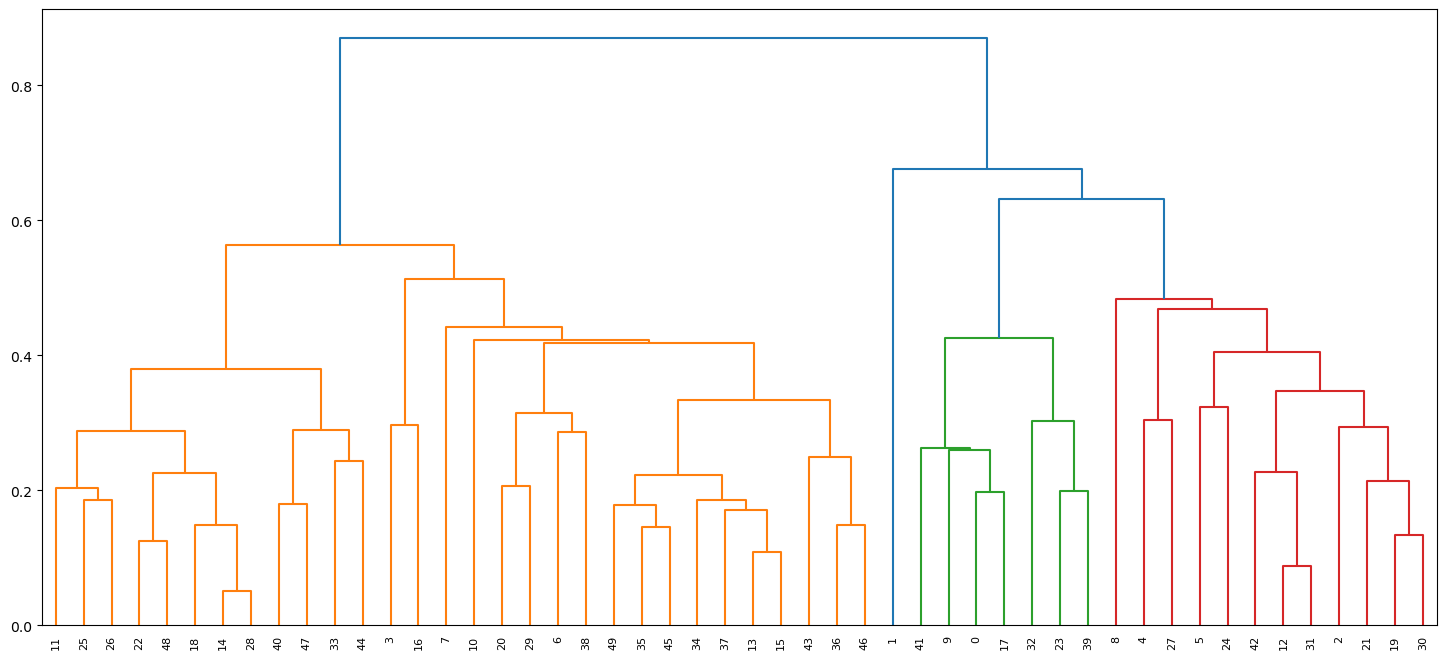

In [113]:
#create Dendrogram
plt.figure(figsize=(18,8))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))


In [114]:
#Creating Clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [115]:
hc

AgglomerativeClustering(linkage='average', n_clusters=3)

In [116]:
# Saving clusters for chart
y_hc=hc.fit_predict(df_norm)
y_hc

array([0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [117]:
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,0
1,2
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [118]:
df_norm['h_clusterid']=clusters
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,2
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0


In [119]:
df_norm.sort_values('h_clusterid')

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
42,0.716867,0.534247,0.813559,0.470284,0
41,0.746988,0.489726,0.457627,0.506460,0
39,0.819277,0.801370,0.271186,0.392765,0
32,0.734940,1.000000,0.220339,0.227390,0
31,0.620482,0.715753,0.915254,0.485788,0
30,0.638554,0.821918,0.644068,0.640827,0
27,0.686747,0.708904,0.830508,1.000000,0
23,0.921687,0.732877,0.203390,0.253230,0
21,0.680723,0.719178,0.711864,0.718346,0


In [120]:
crime['h_clusterid']=clusters
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [121]:
crime.sort_values('h_clusterid')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0
27,Nevada,12.2,252,81,46.0,0
23,Mississippi,16.1,259,44,17.1,0
21,Michigan,12.1,255,74,35.1,0


In [122]:
crime['h_clusterid']=hc.labels_
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


K MEANS

In [123]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [124]:
#read the data
crime1=pd.read_csv('crime_data.csv')
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [125]:
#Normalization Function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_crime1_df=scaler.fit_transform(crime1.iloc[:,1:])
scaled_crime1_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [126]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_crime1_df)

KMeans(n_clusters=4, random_state=0)

In [127]:
kmeans.inertia_

57.55425863091104

In [128]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score
wcss=[]
sil_score=[]
cal_haz_score=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime1_df)
    wcss.append(kmeans.inertia_)
    if i ==1:
        continue #min 2 labels needed for silhoutte and cal_haz score
    sil_score.append(silhouette_score(scaled_crime1_df,kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(scaled_crime1_df,kmeans.labels_))

C:\Users\1TIN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [129]:
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.52026552535068,
 43.92746404497574,
 40.52183461131976,
 34.6873883978491,
 32.70648136388185,
 28.311639397122555]

In [130]:
sil_score

[0.4084890326217641,
 0.3095091512791688,
 0.33968891433344395,
 0.30612803169146263,
 0.29910456843899946,
 0.23035904501364113,
 0.2732934287338534,
 0.2518939934580804,
 0.2652233759332704]

In [131]:
cal_haz_score

[43.46199150301377,
 35.18481487211701,
 37.94972059900646,
 33.28658302470653,
 31.26605066475041,
 28.205209929782704,
 28.594705898193535,
 26.214354074691737,
 26.952143948781234]

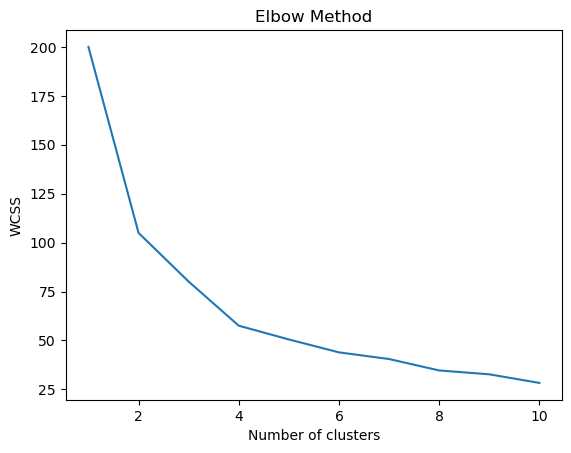

In [132]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [133]:
#select 4 clusters from above screen plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([0, 3, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2])

In [134]:
x=pd.Series(model.labels_)
crime1['clust']=x

In [135]:
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [136]:
crime1.iloc[:,1:5].groupby(crime1.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,12.278947,254.842105,69.473684,28.357895
1,3.600000,78.538462,52.076923,12.176923
2,5.841176,141.882353,72.470588,18.823529
3,10.000000,263.000000,48.000000,44.500000


In [137]:
#build cluster Algorithm
clusters_new=KMeans(5,random_state=42)
clusters_new.fit(scaled_crime1_df)

KMeans(n_clusters=5, random_state=42)

In [138]:
clusters_new.labels_

array([3, 1, 1, 2, 1, 1, 0, 0, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 1,
       4, 3, 1, 2, 2, 1, 4, 0, 1, 1, 3, 4, 0, 2, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 0, 4, 4, 2])

In [139]:
#Assign clusters to the dataset
crime1['clusterid_new']= clusters_new.labels_
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust,clusterid_new
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,3,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,2,2
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
6,Connecticut,3.3,110,77,11.1,2,0
7,Delaware,5.9,238,72,15.8,2,0
8,Florida,15.4,335,80,31.9,0,1
9,Georgia,17.4,211,60,25.8,0,3


In [140]:
#These are standardized values
clusters_new.cluster_centers_

array([[-0.63817386, -0.38827513,  0.88223651, -0.27797516],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.15956455, -0.44557535, -0.39437496, -0.32460067],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445]])

In [141]:
crime1.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\1TIN\AppData\Local\Temp\ipykernel_9096\553629180.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime1.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape,clust
,,mean,mean,mean,mean,mean
0,0,5.036364,138.727273,78.181818,18.654545,2.000000
1,1,10.815385,257.384615,76.000000,33.192308,0.230769
2,2,7.100000,134.000000,59.888889,18.222222,1.666667
3,3,14.671429,251.285714,54.285714,21.685714,0.000000
4,4,2.680000,70.100000,51.000000,10.910000,1.000000


In [142]:
crime1.groupby('clusterid_new').mean()

,Murder,Assault,UrbanPop,Rape,clust
clusterid_new,,,,,
0,5.036364,138.727273,78.181818,18.654545,2.000000
1,10.815385,257.384615,76.000000,33.192308,0.230769
2,7.100000,134.000000,59.888889,18.222222,1.666667
3,14.671429,251.285714,54.285714,21.685714,0.000000
4,2.680000,70.100000,51.000000,10.910000,1.000000


In [143]:
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust,clusterid_new
0,Alabama,13.2,236,58,21.2,0,3
1,Alaska,10.0,263,48,44.5,3,1
2,Arizona,8.1,294,80,31.0,0,1
3,Arkansas,8.8,190,50,19.5,2,2
4,California,9.0,276,91,40.6,0,1
5,Colorado,7.9,204,78,38.7,0,1
6,Connecticut,3.3,110,77,11.1,2,0
7,Delaware,5.9,238,72,15.8,2,0
8,Florida,15.4,335,80,31.9,0,1
9,Georgia,17.4,211,60,25.8,0,3


In [144]:
crime1[crime1['clusterid_new']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust,clusterid_new
0,Alabama,13.2,236,58,21.2,0,3
9,Georgia,17.4,211,60,25.8,0,3
17,Louisiana,15.4,249,66,22.2,0,3
23,Mississippi,16.1,259,44,17.1,0,3
32,North Carolina,13.0,337,45,16.1,0,3
39,South Carolina,14.4,279,48,22.5,0,3
41,Tennessee,13.2,188,59,26.9,0,3


In [145]:
crime1[crime1['clusterid_new']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust,clusterid_new
6,Connecticut,3.3,110,77,11.1,2,0
7,Delaware,5.9,238,72,15.8,2,0
10,Hawaii,5.3,46,83,20.2,2,0
20,Massachusetts,4.4,149,85,16.3,2,0
29,New Jersey,7.4,159,89,18.8,2,0
34,Ohio,7.3,120,75,21.4,2,0
36,Oregon,4.9,159,67,29.3,2,0
37,Pennsylvania,6.3,106,72,14.9,2,0
38,Rhode Island,3.4,174,87,8.3,2,0
43,Utah,3.2,120,80,22.9,2,0


In [146]:
crime1.sort_values('clusterid_new')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust,clusterid_new
46,Washington,4.0,145,73,26.2,2,0
20,Massachusetts,4.4,149,85,16.3,2,0
6,Connecticut,3.3,110,77,11.1,2,0
7,Delaware,5.9,238,72,15.8,2,0
34,Ohio,7.3,120,75,21.4,2,0
10,Hawaii,5.3,46,83,20.2,2,0
43,Utah,3.2,120,80,22.9,2,0
29,New Jersey,7.4,159,89,18.8,2,0
36,Oregon,4.9,159,67,29.3,2,0
38,Rhode Island,3.4,174,87,8.3,2,0


In [147]:
crime1.groupby(['clusterid_new'])['Unnamed: 0'].apply(lambda x:tuple(x))

clusterid_new
0    (Connecticut, Delaware, Hawaii, Massachusetts,...
1    (Alaska, Arizona, California, Colorado, Florid...
2    (Arkansas, Indiana, Kansas, Kentucky, Montana,...
3    (Alabama, Georgia, Louisiana, Mississippi, Nor...
4    (Idaho, Iowa, Maine, Minnesota, New Hampshire,...
Name: Unnamed: 0, dtype: object

DB SCAN


In [148]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [149]:
#reading the document
crime2=pd.read_csv('crime_data.csv')
crime2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [150]:
crime2.shape

(50, 5)

In [151]:
crime2.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [152]:
print(crime2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [153]:
df=crime2.iloc[:,1:5]
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


<AxesSubplot:>

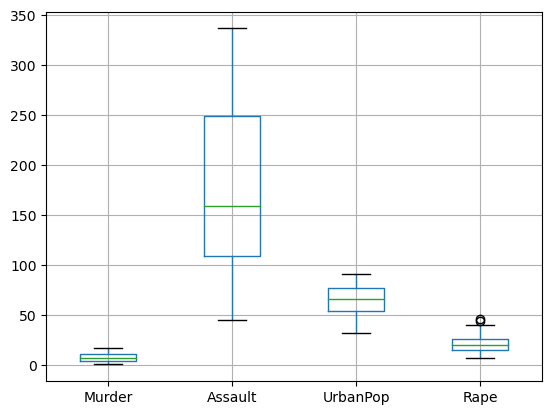

In [154]:
df.boxplot()

<AxesSubplot:>

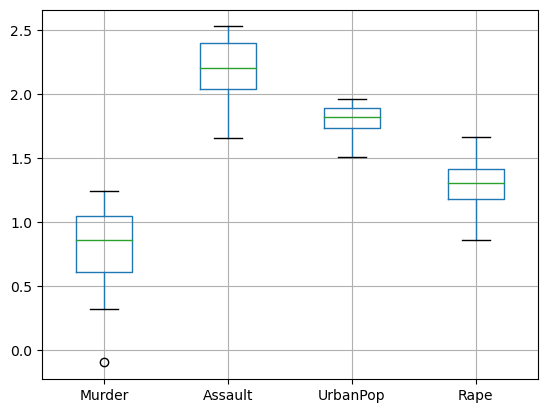

In [155]:
df.apply(np.log10).boxplot()

In [156]:
array=df.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [157]:
stscaler=StandardScaler().fit(df.values)
X=stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [158]:
min_samples=4
dbscan=DBSCAN(eps = 2,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=2)

In [159]:
#Noisy samples are given the label -1
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [160]:
c1=pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [161]:
clustered=pd.concat([crime2,c1],axis=1)
clustered

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [162]:
clustered[clustered['cluster']==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,-1


In [163]:
clustered.mean()

C:\Users\1TIN\AppData\Local\Temp\ipykernel_9096\2647209638.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clustered.mean()


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
cluster      -0.020
dtype: float64

In [164]:
clustered.sort_values('cluster')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,-1
0,Alabama,13.2,236,58,21.2,0
27,Nevada,12.2,252,81,46.0,0
28,New Hampshire,2.1,57,56,9.5,0
29,New Jersey,7.4,159,89,18.8,0
30,New Mexico,11.4,285,70,32.1,0
31,New York,11.1,254,86,26.1,0
32,North Carolina,13.0,337,45,16.1,0
33,North Dakota,0.8,45,44,7.3,0
34,Ohio,7.3,120,75,21.4,0


In [165]:
X.shape

(50, 4)

In [166]:
min_samples

4

DB SCAN ON SAMPLE DATA

In [167]:
from sklearn.datasets import make_moons,make_blobs

X,y=make_moons(1000)
x=X+np.random.rand(1000,2)*0.4

In [168]:
data=pd.DataFrame(X)
data.columns=['feature 1','feature 2']
data['class']=y
data

,feature 1,feature 2,class
0,1.418016,-0.408439,1
1,0.230370,-0.138491,1
2,0.952792,0.303623,0
3,1.047201,-0.498885,1
4,-0.872765,0.488141,0
...,...,...,...
995,0.007917,0.374417,1
996,0.066058,0.997816,0
997,0.836895,0.547364,0
998,1.972991,0.269157,1


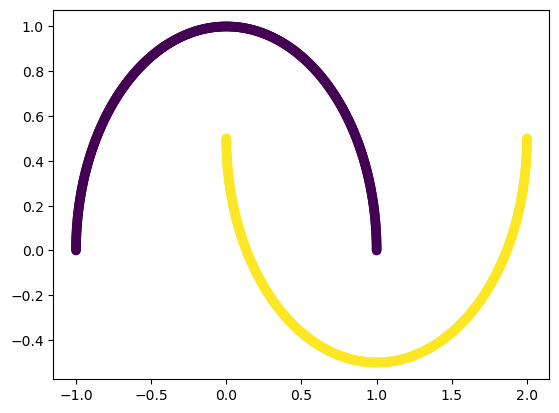

In [169]:
plt.scatter(data['feature 1'], data['feature 2'], c =y)

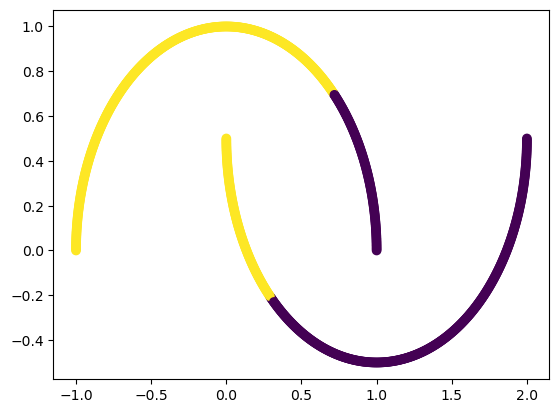

In [170]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters = 2, max_iter = 5, algorithm = 'auto')
model_kmeans.fit(data.iloc[:,:2])
plt.scatter(data['feature 1'], data['feature 2'], c = model_kmeans.labels_)

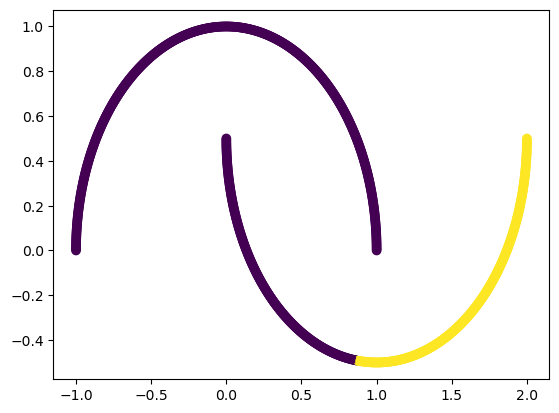

In [171]:
from sklearn.cluster import AgglomerativeClustering
model_agglo = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
model_agglo.fit(data.iloc[:,:2])
plt.scatter(data['feature 1'], data['feature 2'], c = model_agglo.labels_)

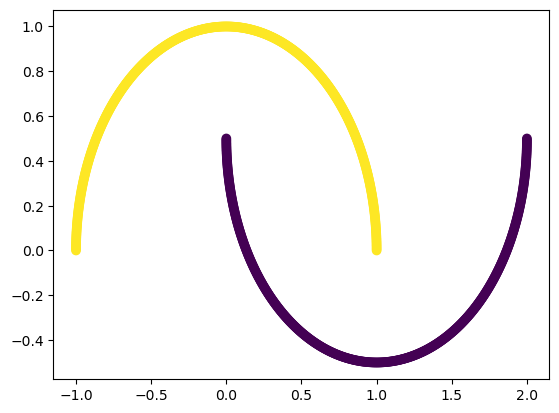

In [172]:
model_dbscan = DBSCAN(eps = 0.1, min_samples = 3)
model_dbscan.fit(data.iloc[:,:2])
plt.scatter(data['feature 1'], data['feature 2'], c = model_dbscan.labels_)

In [173]:
from sklearn.metrics import silhouette_score
silhouette_score(data.iloc[:,:3], model_dbscan.labels_)

0.47801869639303834

In [174]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(data.iloc[:,:3], model_dbscan.labels_)

1085.2804103455946

In [175]:
# import hierarchical clustering libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch #to draw dendrogram
from sklearn.cluster import AgglomerativeClustering #for model building

In [176]:
xlxs=pd.ExcelFile('EastWestAirlines.xlsx')
airline=pd.read_excel(xlxs,'data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [177]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [178]:
airline=airline.drop(['ID#'],axis=1)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [179]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [180]:
#Normalized data frame (considering the numerical part of data)
airline_norm = norm_func(airline)
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


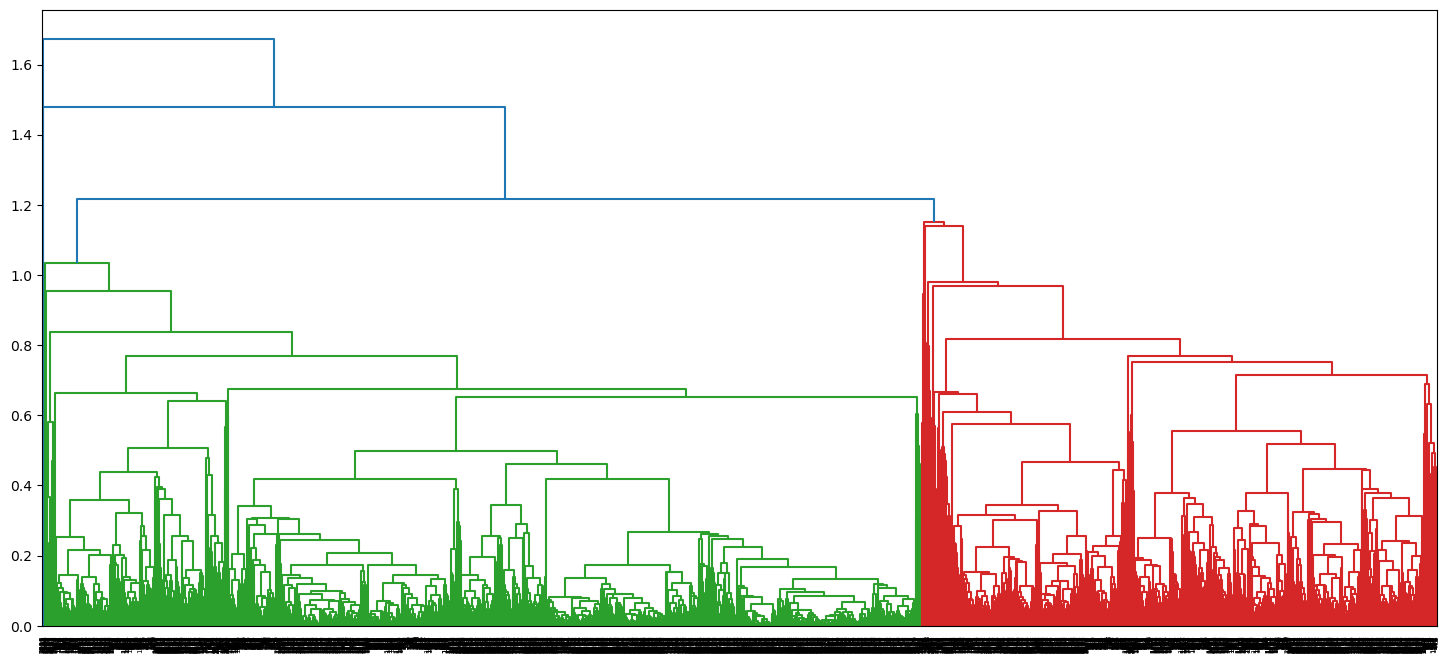

In [181]:
# create dendrograms
plt.figure(figsize=(18,8))
dendrogram = sch.dendrogram(sch.linkage(airline_norm, method='average'))

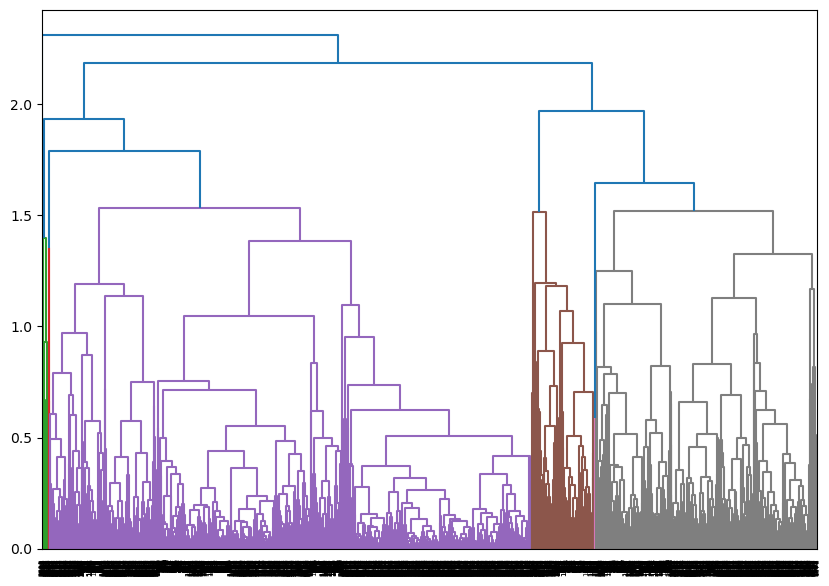

In [182]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline_norm,'complete'))


In [183]:
# create clusters
hc = AgglomerativeClustering(n_clusters = 5,
                            affinity = 'euclidean',
                            linkage = 'average')

In [184]:
hc

AgglomerativeClustering(linkage='average', n_clusters=5)

In [185]:
#save clusters for chart 
y_hc = hc.fit_predict(airline_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [186]:
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [193]:
airline_norm['h_clusterid']=Clusters

In [194]:
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [195]:
airline_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.00,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1505,0.229478,0.000000,0.50,0.0,0.00,0.104181,0.232558,0.051919,0.132075,0.591150,1.0,0
1503,0.297607,0.000000,0.75,0.0,0.00,0.196314,0.209302,0.014602,0.018868,0.574873,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.00,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
1501,0.031743,0.165590,0.50,0.0,0.00,0.132723,0.162791,0.000000,0.000000,0.584278,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,4
1946,0.074419,0.000000,0.75,0.0,1.00,0.362546,0.372093,0.016225,0.018868,0.467567,1.0,4
2364,0.063397,0.000000,1.00,0.0,1.00,0.822974,0.279070,0.000000,0.000000,0.429829,1.0,4
1878,0.075258,0.000000,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,4


In [196]:
airline['h_clusterid']= Clusters
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [197]:
airline.sort_values('h_clusterid')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1505,391222,0,3,1,1,27471,20,1600,7,4905,1,0
1503,507371,0,4,1,1,51765,18,450,1,4770,1,0
3165,194816,0,1,1,1,20822,25,6647,12,2424,1,0
1501,54116,1846,3,1,1,34997,14,0,0,4848,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
1946,126873,0,4,1,5,95598,32,500,1,3880,1,4
2364,108081,0,5,1,5,217006,24,0,0,3567,1,4
1878,128302,0,5,1,4,132263,32,400,2,4103,1,4


In [198]:
y=pd.DataFrame(hc.fit_predict(airline_norm),columns=['clustersid'])
y['clustersid'].value_counts()

1    2518
0    1468
2       8
4       4
3       1
Name: clustersid, dtype: int64

In [199]:
# adding clusters to dataset
airline['clusterid']=hc.labels_

In [200]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,1


In [201]:
airline.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,9.597426e+04,240.572888,2.656676,1.015668,1.000681,28342.702997,15.547003,804.152589,2.461853,4627.118529,1.0,0.0
1,1,5.980784e+04,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.0
2,2,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0,4.0
3,3,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0,2.0
4,4,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,3.0


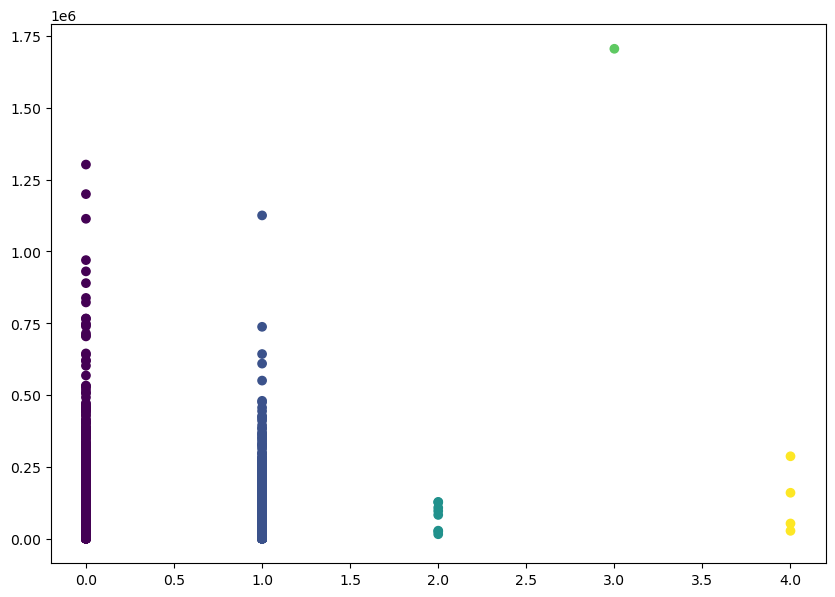

In [202]:
# plot Clusters
plt.figure(figsize=(10,7))
plt.scatter(airline['clusterid'],airline['Balance'], c=hc.labels_)

KMEANS

In [203]:
xlxs=pd.ExcelFile('EastWestAirlines.xlsx')
airline1=pd.read_excel(xlxs,'data')
airline1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [204]:
airline1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [205]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take
print('unique_cc1', airline1.cc1_miles.unique())
print('unique_cc2', airline1.cc2_miles.unique())
print('unique_cc3', airline1.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [206]:
airline1[airline1.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [207]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_airline1_df = scaler.fit_transform(airline1.iloc[:,1:])
scaled_airline1_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [208]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(scaled_airline1_df)

KMeans(n_clusters=4, random_state=0)

In [209]:
kmeans.inertia_

27446.37245668138

In [210]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

wcss = []
sil_score = []
cal_haz_score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_airline1_df)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue #min 2 labels needed for silhoutte and cal_haz score (Refer documentation)
    sil_score.append(silhouette_score(scaled_airline1_df, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(scaled_airline1_df, kmeans.labels_))


In [211]:
wcss

[43989.000000000015,
 35409.51145242436,
 30899.246824652197,
 27446.37245668138,
 24541.32958204578,
 21089.973628929645,
 19165.86145865566,
 17316.866446128297,
 16043.406242309518,
 14726.983322766795]

In [212]:
sil_score

[0.3256981835090824,
 0.3121716765282414,
 0.32563311512799126,
 0.31819537664378844,
 0.3338735662323181,
 0.22085896619040385,
 0.23657639934232003,
 0.2984364654012059,
 0.2617650187720957]

In [213]:
cal_haz_score

[968.4464517601235,
 846.4066128459535,
 802.6294080679738,
 791.2595637632751,
 867.1073529718658,
 861.7228891659855,
 878.1595440795196,
 868.7617322895064,
 880.6675321168498]

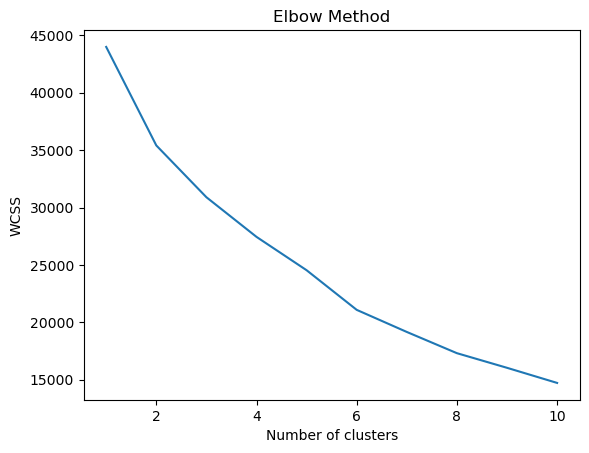

In [214]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [215]:
#Build cluster algorithm
clusters_new = KMeans(5, random_state = 42)
clusters_new.fit(scaled_airline1_df)

KMeans(n_clusters=5, random_state=42)

In [216]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [217]:
#Assign clusters to the data set
airline1['clusterid_new'] = clusters_new.labels_

In [218]:
airline1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [219]:
#These are standardized values.
clusters_new.cluster_centers_

array([[ 1.13984539,  1.05672065,  0.09776869, -0.09824189, -0.06276658,
         0.57151541,  1.51103346,  3.44127553,  3.6610428 ,  0.27107706,
         0.88975067],
       [-0.29035586, -0.05818754, -0.59651518, -0.09824189, -0.06074586,
        -0.51420592, -0.49040819, -0.18783605, -0.19980876, -0.20213465,
        -0.34539972],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.43260424, -0.01954084,  1.22083157, -0.09824189, -0.05447771,
         0.94096329,  0.75568144, -0.09151819, -0.10212979,  0.37689814,
         0.58013031],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [220]:
airline1.groupby('clusterid_new').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid_new,,,,,,,,,,,,
0,1731.100000,188455.641176,961.558824,2.194118,1.000000,1.000000,30945.770588,26.111765,5277.958824,15.258824,4678.300000,0.800000
1,2237.743286,44293.077409,98.530806,1.237362,1.000000,1.000395,4722.390205,6.885861,196.838468,0.614929,3699.326619,0.202607
2,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,1593.586764,117119.906376,130.094431,3.736077,1.000000,1.001614,39793.209040,18.843422,332.092010,0.987086,4897.692494,0.651332
4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [221]:
airline1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [222]:
airline1[airline1['clusterid_new']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,3
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,3
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,3
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,3


In [223]:
airline1[airline1['clusterid_new']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,0
22,23,20584,0,1,1,1,3450,11,3450,11,6884,0,0
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,0
50,51,108137,0,1,1,1,6368,5,6368,5,6844,0,0
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,0
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,0
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,0
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,0


In [224]:
airline1.sort_values('clusterid_new')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
3485,3508,12134,899,4,1,1,57676,25,3064,9,974,1,0
3165,3187,194816,0,1,1,1,20822,25,6647,12,2424,1,0
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,0
2732,2754,109441,0,1,1,1,6500,10,4000,8,2237,1,0
3182,3204,26650,0,1,1,1,4652,11,4652,11,1958,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,4
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,4
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,4


In [225]:
airline1['clusterid_new'].value_counts()

1    2532
3    1239
0     170
2      43
4      15
Name: clusterid_new, dtype: int64

In [226]:
# DBSCAN

In [227]:
#import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [228]:
# Import .csv file and convert it to a dataframe object
xlsx = pd.ExcelFile("EastWestAirlines.xlsx")
airline2 = pd.read_excel(xlsx,'data')
airline2


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [229]:
airline2.shape

(3999, 12)

In [230]:
airline2.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [231]:
print(airline2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [232]:
airline2.drop(['ID#'], axis=1, inplace=True)

In [233]:
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [234]:
airline2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


<AxesSubplot:>

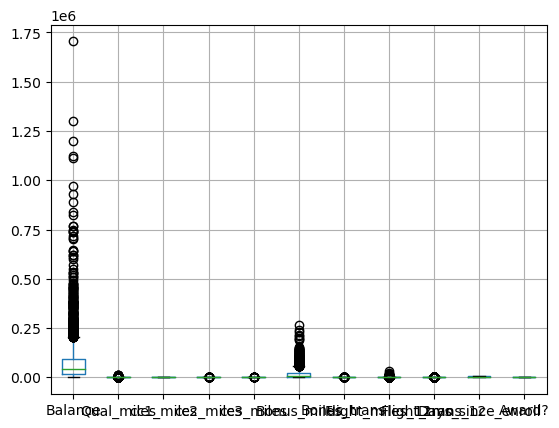

In [235]:
airline2.boxplot()

C:\Users\1TIN\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\1TIN\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\1TIN\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\1TIN\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\1TIN\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<AxesSubplot:>

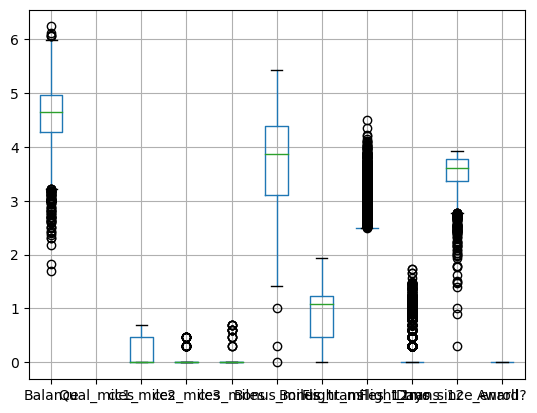

In [236]:
airline2.apply(np.log10).boxplot()

In [237]:
array = airline2.values

In [238]:
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [239]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [240]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [241]:
#min_samples = 4
dbscan = DBSCAN(eps = 0.4, min_samples = 3)
dbscan.fit(X)

DBSCAN(eps=0.4, min_samples=3)

In [242]:
#Noisy samples are given the table -1
dbscan.labels_

array([ 0,  0,  0, ..., 48,  0,  0], dtype=int64)

In [243]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,48
3997,0


In [244]:
clustered = pd.concat([airline2, cl], axis = 1)

In [245]:
clustered

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,48
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [246]:
clustered[clustered['cluster']== -1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
6,84914,0,3,1,1,27482,25,0,0,6994,0,-1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,-1
19,23354,0,3,1,1,10447,5,0,0,6896,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3978,10071,0,2,1,1,27701,16,0,0,1421,1,-1
3979,57793,0,3,1,1,20959,15,1198,3,1424,1,-1
3980,28867,0,3,1,1,19169,28,0,0,1425,0,-1
3985,59017,0,4,1,1,34746,25,0,0,1418,0,-1


In [247]:
clustered.mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
cluster                  2.896974
dtype: float64

In [248]:
clustered.sort_values('cluster')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,-1
3108,17219,0,1,1,1,6167,10,3757,6,2627,1,-1
1420,68891,1697,4,1,1,37257,14,500,1,5178,1,-1
1419,168897,0,4,1,1,37451,24,400,2,5189,0,-1
1418,32313,0,4,1,1,29188,27,0,0,5397,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3877,63162,0,3,1,1,27564,8,0,0,1600,1,48
3996,73597,0,3,1,1,25447,8,0,0,1402,1,48
3801,89876,0,4,1,1,51620,17,0,0,1739,0,49
3823,86500,0,4,1,1,51740,20,0,0,1691,0,49


In [249]:
X.shape

(3999, 11)

In [250]:
min_samples

4

DBSCAN on SAMPLE DATA SET

In [251]:
from sklearn.datasets import make_moons, make_blobs

X, y = make_moons(1000)
X = X + np.random.rand(1000, 2)*0.4

In [252]:
data = pd.DataFrame(X)
data.columns = ['feature 1', 'feature 2']
data['class'] = y
data

,feature 1,feature 2,class
0,1.111593,-0.477981,1
1,1.021889,0.911900,0
2,-0.915171,0.643989,0
3,0.771704,0.868655,0
4,0.792561,-0.308594,1
...,...,...,...
995,-0.769670,0.678461,0
996,1.522789,-0.274024,1
997,2.170887,0.326616,1
998,1.150475,-0.197528,1


In [255]:
from sklearn.metrics import silhouette_score
silhouette_score(data.iloc[:,:3], model_dbscan.labels_)

-0.00011484974233406669

In [254]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(data.iloc[:,:3], model_dbscan.labels_)

0.6039042974170744